In [1]:
pip install yfinance


                                              0.0/62.5 kB ? eta -:--:--
     ---------------------------------------  61.4/62.5 kB ? eta -:--:--
     ---------------------------------------  61.4/62.5 kB ? eta -:--:--
     ---------------------------------------  61.4/62.5 kB ? eta -:--:--
     ---------------------------------------  61.4/62.5 kB ? eta -:--:--
     ---------------------------------------  61.4/62.5 kB ? eta -:--:--
     -------------------------------------- 62.5/62.5 kB 176.4 kB/s eta 0:00:00
                                              0.0/62.6 kB ? eta -:--:--
     ---------------------------------------  61.4/62.6 kB ? eta -:--:--
     ---------------------------------------- 62.6/62.6 kB 1.1 MB/s eta 0:00:00
                                              0.0/3.8 MB ? eta -:--:--
     ---                                      0.3/3.8 MB 9.9 MB/s eta 0:00:01
     --------                                 0.8/3.8 MB 9.7 MB/s eta 0:00:01
     ------------             

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
stocks = input("Enter the code of the stocks")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stocksNG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [6]:
data.shape

(3282, 5)

In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


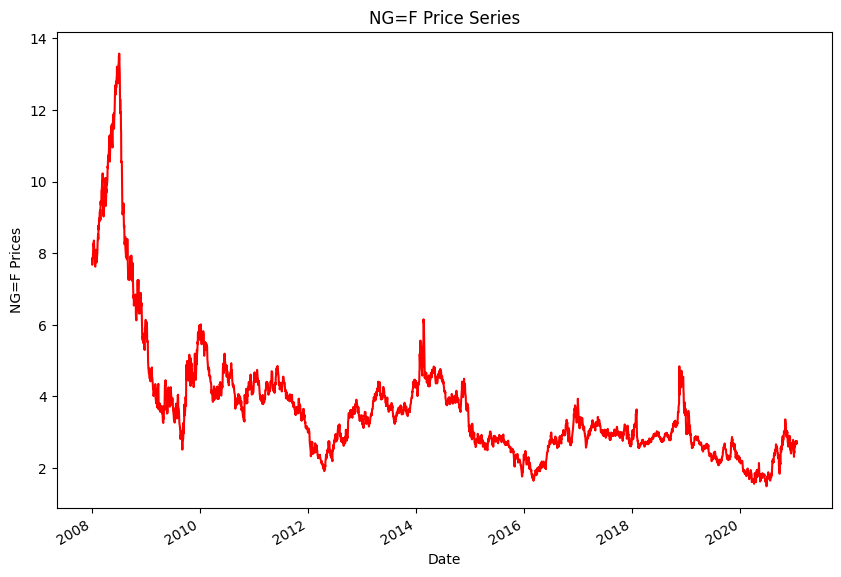

In [10]:
data.Close.plot(figsize=(10 ,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

In [12]:
X = data.drop("Close", axis=1)
y = data["Close"]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


# The train_test_split function takes the X and y variables and splits them into four new sets of data:
# x_train: This contains a portion of the house information (features) that will be used to train the machine learning model.
# x_test: This contains another portion of the house information that will be used to test or evaluate how well the trained model performs.
# y_train: This contains the corresponding house prices for the training data.
# y_test: This contains the corresponding house prices for the testing data.
# The test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.

# The random_state=0 ensures that the data is split in the same way each time the code is run, which helps in getting consistent results.

(2625, 4)
(657, 4)
(2625,)
(657,)


In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)  #fit=Train the data #Training the model: We train the Linear Regression model using the x_train and y_train datasets. This means the model learns from the relationship between the input features (independent variables) x_train and the corresponding target variable (dependent variable) y_train. The model tries to find the best-fit line that represents this relationship.
pred1 = lr.predict(x_test)
pred1

array([ 2.80025521,  5.71452107,  2.67598004,  5.96209712,  2.11272627,
       12.78073553,  3.96962911,  4.87093937,  1.7957296 ,  4.77535218,
        2.88317702,  3.52438236,  2.78074708,  2.97823651,  4.2320276 ,
        2.46605691,  4.14343586,  4.57617542,  9.00290889,  2.93461728,
        4.41981471,  2.6638892 ,  2.54609005,  2.35659708,  2.85304719,
        1.96549634,  2.77466247,  3.91456824,  3.30051883,  4.7520832 ,
        4.02003703,  2.7084426 , 11.73817085,  4.23592618,  4.39406688,
        3.68320373,  3.52338075,  5.32779806,  3.6551215 ,  3.42242166,
        3.96382871,  2.42903792,  2.68051977,  2.61045398,  3.13018683,
        4.4270207 ,  4.27296423,  2.75934544,  3.85466274,  1.99377504,
        4.10987778,  2.45974884,  2.27348621,  3.96081824,  1.9306302 ,
        3.23567102,  3.76555422,  4.96458716,  4.33327308,  3.4028305 ,
        2.71162414,  3.90478554,  4.75601461,  3.15688221,  2.4433227 ,
        2.55267657,  4.36853634,  3.90557551,  2.4086365 ,  2.85